In [265]:
import time
import wave
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

In [266]:
FILENAME = "audio1.wav"

In [267]:
def plot_waveform(file):
    plt.title("Waveform of the audio")
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    signal = np.frombuffer(file.readframes(-1), np.int8)
    plt.plot(signal, color="blue")
    plt.show()

In [268]:
def play_audio(file):
    CHUNK = 1024
    
    # Initialize PyAudio
    audio = pyaudio.PyAudio()

    # Open stream
    stream = audio.open(format=audio.get_format_from_width(file.getsampwidth()),
                        channels=file.getnchannels(),
                        rate=file.getframerate(),
                        output=True)
    
    data = file.readframes(CHUNK)
    
    while len(data) > 0:
        stream.write(data)
        data = file.readframes(CHUNK)
    
    stream.stop_stream()
    stream.close()
    
    audio.terminate()

In [269]:
# Function to measure latency
def measure_latency(file):
    # Record start time
    start_time = time.time()

    # DSP System
    play_audio(file)
    
    # Calculate elapsed time
    elapsed_time = time.time() - start_time
    
    # Calculate latency in milliseconds
    latency_ms = elapsed_time * 1000
    return latency_ms

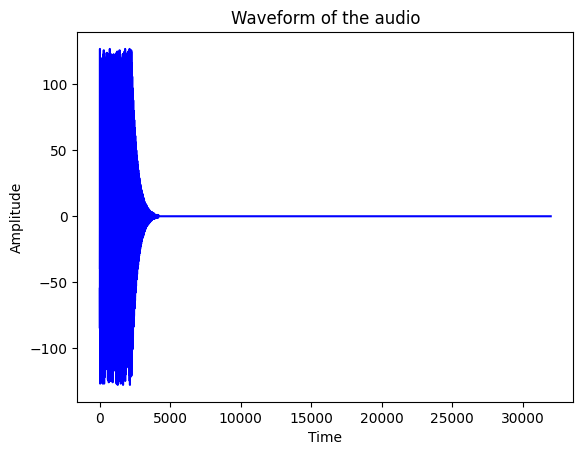

Latency of the RNN Digital Filter: 172.7912425994873 milliseconds


In [270]:
if __name__ == "__main__":
    # Open file
    file = wave.open(FILENAME, "rb")
    
    if file.getnchannels() == 2:
        print("Stereo Files not supported!, Please use Mono Files.")
        exit()
    else:
        plot_waveform(file)
        print("Latency of the RNN Digital Filter:", measure_latency(file), "milliseconds")

In [271]:
#plt.figure(figsize=(14, 5))